In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pprint

def readraffile(path):                      #读取raf文件，返回文件的二进制数据，形式为bytes
    with open(path, 'rb') as file:
        file_data = file.read()
    return file_data

def printlonglist(data,N=16): #如何输出一个很长的列表
    for i in range(len(data)):
        print(f"{data[i]:<{5}}",end=' ')
        if i%N==(N-1):
            print()
    print()

def show_data(data,num_space=4,num_line=32):  #传入的是文件的二进制数据，以16进制展示，由于bytes直接print是ASCII码，所以需要转换比较适合表征波形幅值
    data=data.hex()#将bytes转化为一整个16进制文件
    for i in range(len(data)):
        print(data[i], end='')
        if i % num_space == num_space-1:
            print(' ',end='')
        if i % num_line == num_line-1:
            print()

def datalist_value(data):                    #传入的是文件的二进制数据，返回四个'字'组成的有效数据对应的十六进制整数构成的list，并且去掉了首个表示文件大小的字
    value=[]
    for i in range(2,len(data),2):
        value.append(data[i+1]*16**2+data[i])
        # print('===')
    return value

def list_value_hex(value_list):              #传入的是list，其元素是整数，将其转换为四位16进制字符串
    value_hex=[]
    for i in value_list:
        value_hex.append(f'{i:04X}')
    return value_hex

def hex_hex_value(value_hex):                #传入的是list，其元素是四位16进制字符串，将其转换为整数
    value_list=[]
    for i in value_hex:
        value_list.append(int(i,16))
    return value_list

def writeraffile(value_list,path):           #传入的是整数列表，以16进制写入目标文件，不用管首位表示文件大小的那个，我已经帮你补进去了
    data=[0x00,0x80]                         #整数列表是一个长度是0x3fff，每位是0x0000到0x3fff之间的整数
    for i in value_list:
        valuehex=f'{i:04x}'
        # print(valuehex)
        data.append(int(valuehex[2:4],16))
        data.append(int(valuehex[0:2],16))
    # print(data)
    mybet=bytearray(data)
    print('出去开头的0080，写入的数据为:')
    show_data(mybet[2:],num_space=2,num_line=64)
    with open(path, "wb") as file:
        file.write(mybet)


def plot_scatter(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.figure(figsize=(20,4))
    plt.scatter(np.arange(len(x)),x,marker='o', s=0.1)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # # 设置X轴和Y轴范围
    # plt.xlim(0, 2000)  # 设置X轴范围
    # plt.ylim(0, 2000)  # 设置Y轴范围
    plt.show()

def plot_line(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis',xlim=(),linewidth=0.1):
    # 绘制散点图
    plt.figure(figsize=(20,4))
    plt.plot(np.arange(len(x)),x, label='数据线', color='blue',linewidth=linewidth)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # 设置X轴和Y轴范围
    if len(xlim)!=0:
        plt.xlim(xlim[0], xlim[1])  # 设置X轴范围
    # plt.ylim(0, 1200)  # 设置Y轴范围
    plt.show()

# 示波器和16进制文件读取

* 16进制文件读取中中每个"字"都是都是16位的，是'0,1,...,e,f'
* 示波器要求每两个字组成一个数据点，每两个数据点组成一个数据，其中前面个数据点表示低位，后面两个数据点表示高位
* 示波器中每一个数据最大是3FFF
* 示波器要求第一个数据用于存储数据点的个数（以16进制数记录）

# 一个512等分的，占空比为25%的波形

0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     31    31    31    31    31    31    31    31    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     63    63    63    63    63    63    63    63    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     95    95    95    95    95    95    95    95    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     127   127   127   127   127   127   127   127   
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     159   159   159   159   159   159   159   159   
0     0     0     0     0     

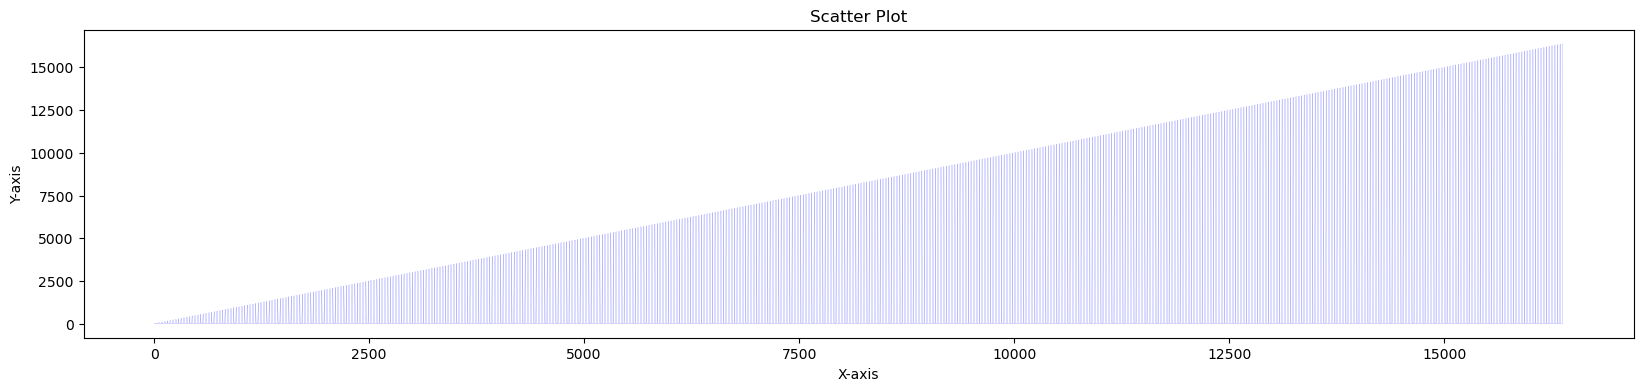

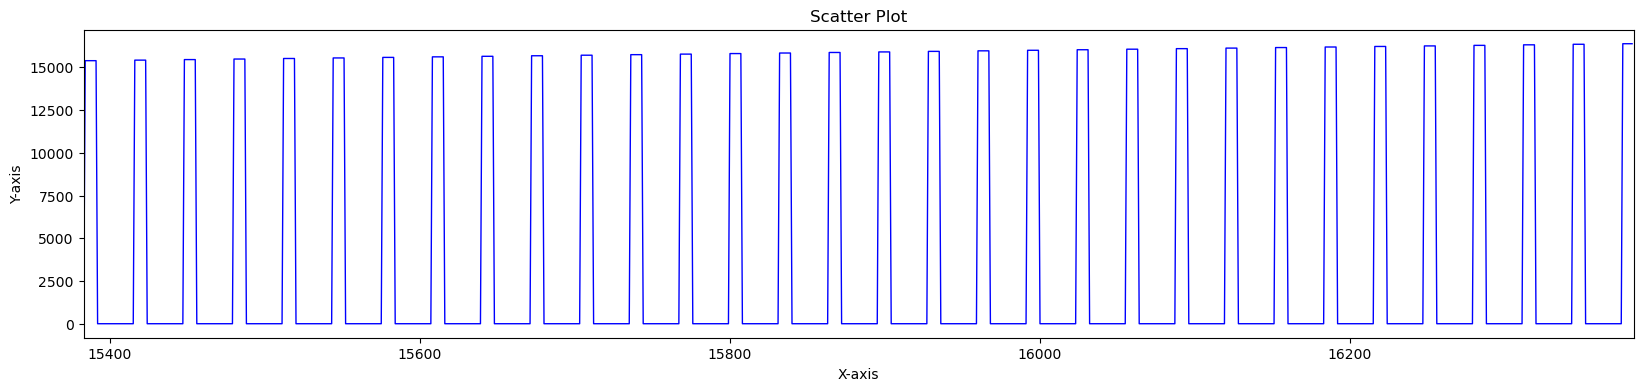

出去开头的0080，写入的数据为:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 
00 00 00 00 

In [2]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
Nb=512
Ns=4
dx=lenth/(Nb*Ns)
dy=max/Nb

newvalue=[]
for i in range(lenth):
    ismall=int(i/dx)
    ibig=ismall//Ns
    ismall_in_big=ismall-Ns*ibig
    # ibig从0遍历到Nb-1，ismall从0遍历到Nb*Ns-1，ismall_in_big对于每一个固定的ibig从0遍历到Ns-1
    
    # print(i,ibig,int(i/(Ns*dx)),ismall,ismall_in_big) #如何表征二重分割
    # # print(ibig*dy)
    if ismall_in_big%Ns==(Ns-1):
        newvalue.append(int((ibig+1)*dy)) #考虑到ibig从0遍历到Nb-1，ismall从0遍历到Nb*Ns-1，ismall_in_big对于每一个固定的ibig从0遍历到Ns-1
    else:
        newvalue.append(0)



printlonglist(newvalue)
printlonglist(list_value_hex(newvalue))
# plot_scatter(newvalue)
plot_line(newvalue)
plot_line(newvalue,xlim=(lenth-1000,lenth),linewidth=1)


writeraffile(newvalue,'512steps_zkb_25.raf')

# 一个50等分的，占空比为35%的波形

这种情形不利于非编程手段，之前的双重等分法也无法解决，下面给出的可以称为“区间相对位置法”，主要是成功找到（别人可能的确一眼看出，我脑子比较笨）表征在小区间内相对位置的值。

0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     

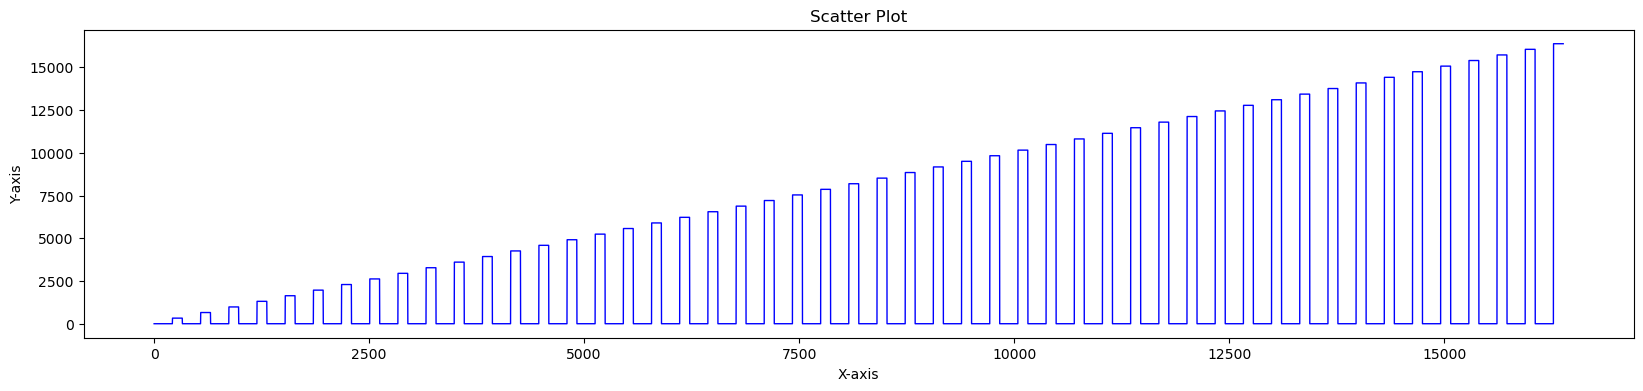

出去开头的0080，写入的数据为:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 

In [3]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
N=50
dx=lenth/N
dy=max/N 

newvalue=[]
for i in range(lenth):
    i_=int(i/dx)
    local=i/dx-i_
    # print(i,i_,local) #考虑到i从0遍历到lenth-1,i_是被等分区间的编号，从0遍历到N-1；local在每个等分区间上从0线性增长到1，用于判断当前值在小区间上的相对位置
    if local>=1-0.35: #需要怎样的占空比都可以设置，包括占空比的倒数不是整数的情况，也可以任意设置脉冲的位置
        newvalue.append(int((i_+1)*dy))
    else:
        newvalue.append(0)

printlonglist(newvalue)
# printlonglist(list_value_hex(newvalue))
plot_line(newvalue,linewidth=1)
# plot_line(newvalue,xlim=(lenth-1000,lenth),linewidth=1)

writeraffile(newvalue,'512steps_zkb_35.raf')

存入数据的10进制整数表示
0     0     0     0     7     7     7     7     0     0     0     0     15    15    15    15    
0     0     0     0     23    23    23    23    0     0     0     0     31    31    31    31    
0     0     0     0     39    39    39    39    0     0     0     0     47    47    47    47    
0     0     0     0     55    55    55    55    0     0     0     0     63    63    63    63    
0     0     0     0     71    71    71    71    0     0     0     0     79    79    79    79    
0     0     0     0     87    87    87    87    0     0     0     0     95    95    95    95    
0     0     0     0     103   103   103   103   0     0     0     0     111   111   111   111   
0     0     0     0     119   119   119   119   0     0     0     0     127   127   127   127   
0     0     0     0     135   135   135   135   0     0     0     0     143   143   143   143   
0     0     0     0     151   151   151   151   0     0     0     0     159   159   159   159   
0     0     0   

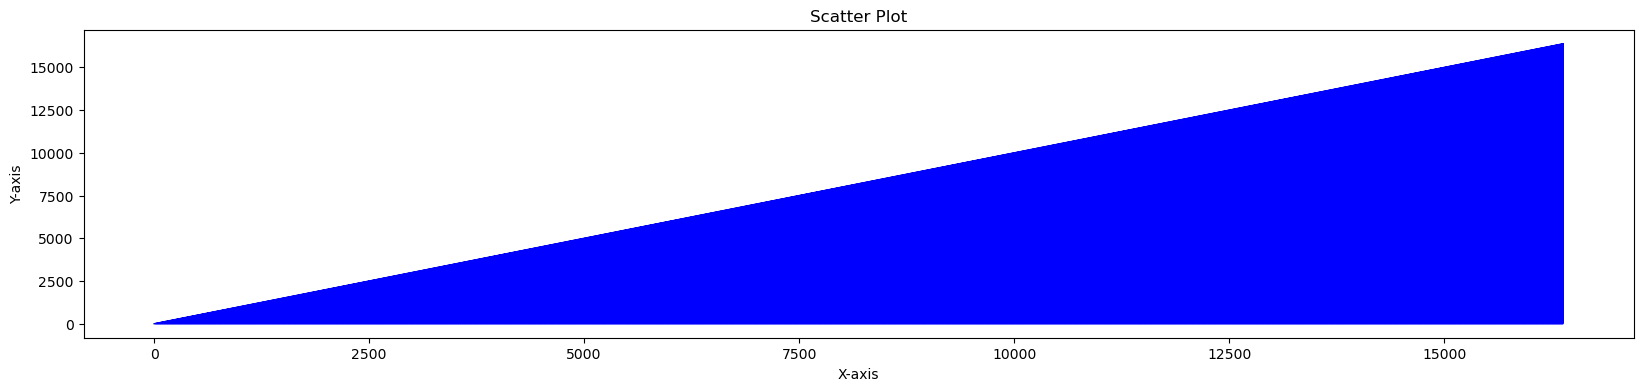

出去开头的0080，写入的数据为:
00 00 00 00 00 00 00 00 07 00 07 00 07 00 07 00 00 00 00 00 00 00 00 00 0f 00 0f 00 0f 00 0f 00 
00 00 00 00 00 00 00 00 17 00 17 00 17 00 17 00 00 00 00 00 00 00 00 00 1f 00 1f 00 1f 00 1f 00 
00 00 00 00 00 00 00 00 27 00 27 00 27 00 27 00 00 00 00 00 00 00 00 00 2f 00 2f 00 2f 00 2f 00 
00 00 00 00 00 00 00 00 37 00 37 00 37 00 37 00 00 00 00 00 00 00 00 00 3f 00 3f 00 3f 00 3f 00 
00 00 00 00 00 00 00 00 47 00 47 00 47 00 47 00 00 00 00 00 00 00 00 00 4f 00 4f 00 4f 00 4f 00 
00 00 00 00 00 00 00 00 57 00 57 00 57 00 57 00 00 00 00 00 00 00 00 00 5f 00 5f 00 5f 00 5f 00 
00 00 00 00 00 00 00 00 67 00 67 00 67 00 67 00 00 00 00 00 00 00 00 00 6f 00 6f 00 6f 00 6f 00 
00 00 00 00 00 00 00 00 77 00 77 00 77 00 77 00 00 00 00 00 00 00 00 00 7f 00 7f 00 7f 00 7f 00 
00 00 00 00 00 00 00 00 87 00 87 00 87 00 87 00 00 00 00 00 00 00 00 00 8f 00 8f 00 8f 00 8f 00 
00 00 00 00 00 00 00 00 97 00 97 00 97 00 97 00 00 00 00 00 00 00 00 00 9f 00 9f 00 9f 00 9f 00 
00 00 00 00 

In [10]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
N=2048
dx=lenth/N
dy=max/N 

newvalue=[]
for i in range(lenth):
    i_=int(i/dx)
    local=i/dx-i_
    # print(i,i_,local) #考虑到i从0遍历到lenth-1,i_是被等分区间的编号，从0遍历到N-1；local在每个等分区间上从0线性增长到1，用于判断当前值在小区间上的相对位置
    if local>=1-0.50: #需要怎样的占空比都可以设置，包括占空比的倒数不是整数的情况，也可以任意设置脉冲的位置
        newvalue.append(int((i_+1)*dy))
    else:
        newvalue.append(0)

print("存入数据的10进制整数表示")
printlonglist(newvalue)
# printlonglist(list_value_hex(newvalue))
plot_line(newvalue,linewidth=1)
# plot_line(newvalue,xlim=(lenth-1000,lenth),linewidth=1)

writeraffile(newvalue,'1024steps.raf')

In [5]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
N=13
dx=lenth/N
dy=max/N 
# print(((lenth-1)*N)/lenth)

newvalue=[]
for i in range(lenth):
    i_=int(i/dx)
    local=i/dx-i_
    print(f"i={i:<10},i_={i_:<10},local={local:<{30}},i/dx={i/dx:<{30}}") #考虑到i从0遍历到lenth-1,i_是被等分区间的编号，从0遍历到N-1；local在每个等分区间上从0线性增长到1，用于判断当前值在小区间上的相对位置
    # if local>=1-0.35: #需要怎样的占空比都可以设置，包括占空比的倒数不是整数的情况，也可以任意设置脉冲的位置
    #     newvalue.append(int((i_+1)*dy))
    # else:
    #     newvalue.append(0)

# printlonglist(newvalue)
# # printlonglist(list_value_hex(newvalue))
# plot_line(newvalue,linewidth=1)
# # plot_line(newvalue,xlim=(lenth-1000,lenth),linewidth=1)

# writeraffile(newvalue,'512steps_zkb_35.raf')

i=0         ,i_=0         ,local=0.0                           ,i/dx=0.0                           
i=1         ,i_=0         ,local=0.0007935054629799182         ,i/dx=0.0007935054629799182         
i=2         ,i_=0         ,local=0.0015870109259598364         ,i/dx=0.0015870109259598364         
i=3         ,i_=0         ,local=0.0023805163889397546         ,i/dx=0.0023805163889397546         
i=4         ,i_=0         ,local=0.003174021851919673          ,i/dx=0.003174021851919673          
i=5         ,i_=0         ,local=0.003967527314899591          ,i/dx=0.003967527314899591          
i=6         ,i_=0         ,local=0.004761032777879509          ,i/dx=0.004761032777879509          
i=7         ,i_=0         ,local=0.005554538240859427          ,i/dx=0.005554538240859427          
i=8         ,i_=0         ,local=0.006348043703839346          ,i/dx=0.006348043703839346          
i=9         ,i_=0         ,local=0.007141549166819264          ,i/dx=0.007141549166819264          


In [11]:
import os

# 获取当前目录下的所有文件
file_list = [f for f in os.listdir() if os.path.isfile(f)]

# 按文件的最后修改时间进行排序，从上到下依次是从早到晚
sorted_file_list = sorted(file_list, key=lambda x: os.path.getmtime(x))

# 打印所有文件名
for file_name in sorted_file_list:
    if file_name[-3:]=='raf':
        print(file_name)



512AAAAAAA.raf
8层阶梯波形.raf
8层阶梯波形仿.raf
512steps1.raf
8层阶梯波形仿2.raf
512steps.raf
512steps_zkb_50.raf
512steps_zkb_25.raf
512steps_zkb_35.raf
512steps_zkb_30.raf
1024steps.raf


0     0     0     0     7     7     7     7     0     0     0     0     15    15    15    15    
0     0     0     0     23    23    23    23    0     0     0     0     31    31    31    31    
0     0     0     0     39    39    39    39    0     0     0     0     47    47    47    47    
0     0     0     0     55    55    55    55    0     0     0     0     63    63    63    63    
0     0     0     0     71    71    71    71    0     0     0     0     79    79    79    79    
0     0     0     0     87    87    87    87    0     0     0     0     95    95    95    95    
0     0     0     0     103   103   103   103   0     0     0     0     111   111   111   111   
0     0     0     0     119   119   119   119   0     0     0     0     127   127   127   127   
0     0     0     0     135   135   135   135   0     0     0     0     143   143   143   143   
0     0     0     0     151   151   151   151   0     0     0     0     159   159   159   159   
0     0     0     0     167   

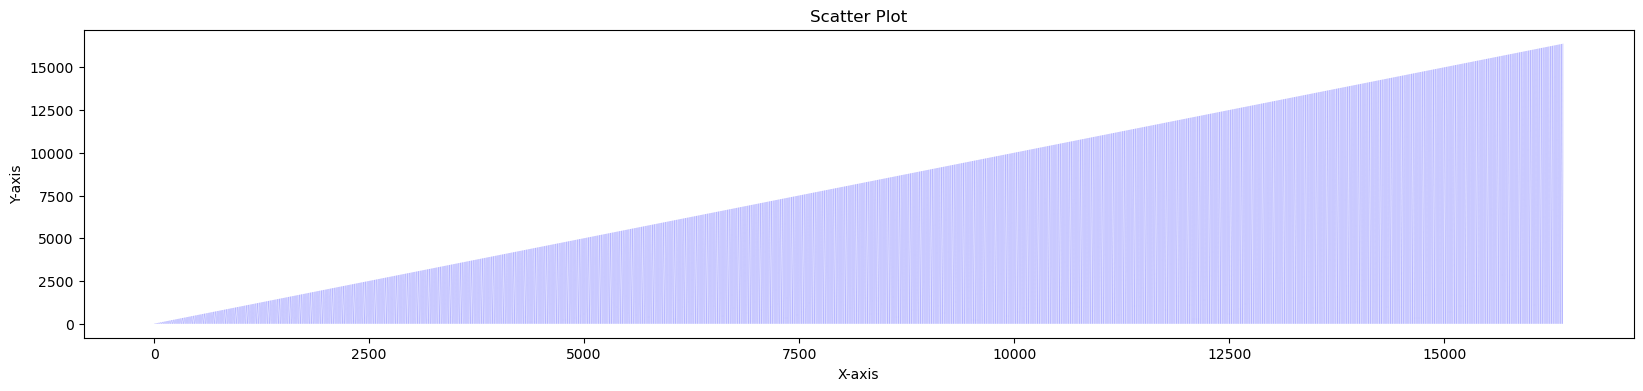

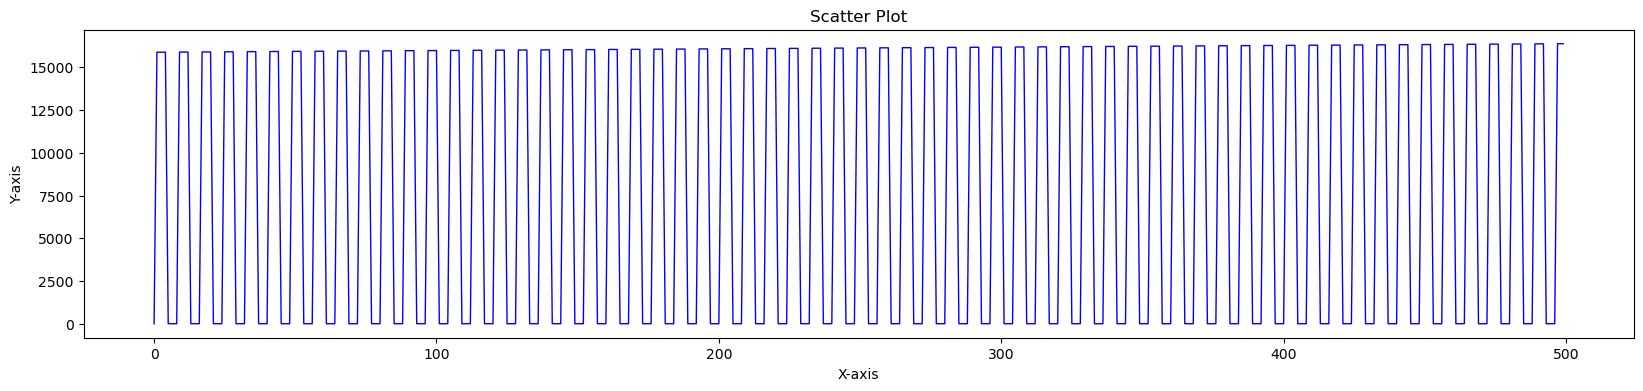

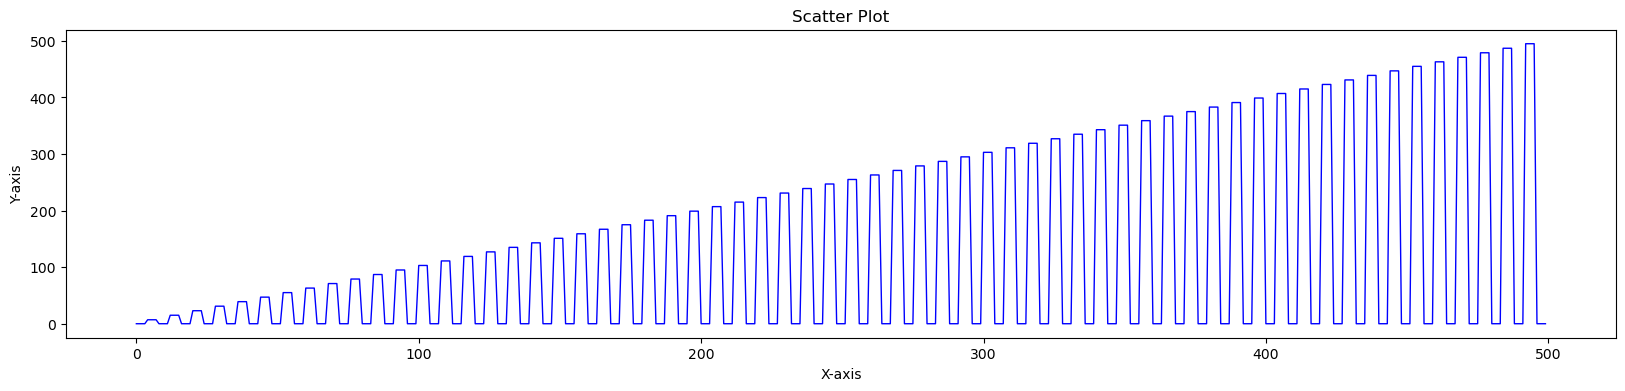

In [18]:
data=readraffile('1024steps.raf')
# data1=datatrans(data)
# show_data(data)
data1=datalist_value(data)
printlonglist(data1)
plot_line(data1,linewidth=0.05)
plot_line(data1[-500:],linewidth=1)
plot_line(data1[:500],linewidth=1)